## Intrusion Detection based on Federated Learning

In [106]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
399269,-0.439051,0.334609,-0.004130,-0.008304,0.015762,-0.007307,0.247093,-0.290294,0.228144,0.336978,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441,BENIGN
999638,-0.440534,-0.493807,-0.010700,-0.009288,-0.049096,-0.007703,-0.253248,0.214118,-0.156210,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441,BENIGN
917560,-0.440534,-0.492783,-0.008072,-0.009288,-0.029963,-0.007670,-0.206533,0.794956,0.021905,-0.252219,...,0.002339,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441,BENIGN
1450239,-0.440534,-0.494466,-0.010700,-0.009288,-0.050149,-0.007762,-0.260624,0.122407,-0.184334,-0.252219,...,0.002339,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441,BENIGN
900837,-0.440534,2.713282,-0.010700,-0.009288,-0.045585,-0.007690,-0.218827,0.397541,-0.062465,-0.217203,...,0.002339,-0.092172,-0.110665,-0.132976,-0.061457,3.967727,-0.122628,3.832161,4.026191,BENIGN


In [1]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
import os
folder_path = "D:\Datasets\MTP_datasets\Datasets\MachineLearningCSV\MachineLearningCVE"
all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]


In [3]:
all_files

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [4]:
specific_csv = 'Monday-WorkingHours.pcap_ISCX.csv'
if specific_csv in all_files:
    all_files.remove(specific_csv)

In [5]:
import pandas as pd
list_of_dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
df = pd.concat(list_of_dfs, ignore_index=True)

In [6]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300820,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2300821,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2300822,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2300823,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True) 
df.columns = df.columns.str.strip()
df.drop_duplicates(inplace=True)
df = df.reset_index().drop(columns = ['index'])

In [8]:
df['Label'].value_counts()

BENIGN                        1592732
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
features = df.drop(columns = ['Label'])
features = scaler.fit_transform(features)
features

array([[ 2.57096943, -0.49447178, -0.0107002 , ..., -0.12262781,
        -0.407408  , -0.38644111],
       [ 2.58135355, -0.49446887, -0.0120143 , ..., -0.12262781,
        -0.407408  , -0.38644111],
       [ 2.58140849, -0.49447043, -0.0120143 , ..., -0.12262781,
        -0.407408  , -0.38644111],
       ...,
       [ 2.74486218, -0.49446961, -0.0107002 , ..., -0.12262781,
        -0.407408  , -0.38644111],
       [-0.44053427, -0.46566466, -0.00544377, ..., -0.12262781,
        -0.407408  , -0.38644111],
       [-0.44053427, -0.49186378, -0.00807199, ..., -0.12262781,
        -0.407408  , -0.38644111]])

In [10]:
df = pd.concat([pd.DataFrame(features, columns = df.columns[:-1]), df['Label']], axis = 1)
df.columns = df.columns.str.strip()
df.drop_duplicates(inplace=True)
df.dropna(inplace = True)
df.reset_index().drop(columns = ['index'])

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.570969,-0.494472,-0.010700,-0.011255,-0.053835,-0.007800,-0.286440,-0.198582,-0.282766,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
1,2.581354,-0.494469,-0.012014,-0.010271,-0.054361,-0.007797,-0.286440,-0.198582,-0.282766,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
2,2.581408,-0.494470,-0.012014,-0.010271,-0.054361,-0.007797,-0.286440,-0.198582,-0.282766,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
3,2.096871,-0.494471,-0.012014,-0.010271,-0.054361,-0.007797,-0.286440,-0.198582,-0.282766,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
4,2.570860,-0.494472,-0.010700,-0.011255,-0.053835,-0.007800,-0.286440,-0.198582,-0.282766,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018468,-0.440534,-0.493587,-0.008072,-0.009288,-0.045058,-0.007734,-0.259395,0.137692,-0.179647,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
2018469,-0.440534,-0.494463,-0.010700,-0.009288,-0.047516,-0.007643,-0.242184,0.351685,-0.114025,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
2018470,2.744862,-0.494470,-0.010700,-0.010271,-0.052167,-0.007797,-0.255707,-0.290294,-0.238237,-0.184376,...,0.002339,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN
2018471,-0.440534,-0.465665,-0.005444,-0.009288,-0.038037,-0.007689,-0.254477,0.198833,-0.160898,-0.252219,...,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.40152,-0.122628,-0.407408,-0.386441,BENIGN


In [11]:
sum(df.isna().sum())

0

In [12]:
any(df.isna().sum())

False

In [13]:
# Import necessary module
from sklearn.preprocessing import LabelEncoder

# Make a copy of your dataframe
df_encoded = df.copy()

# Create a label (category) encoder object
le = LabelEncoder()

# Apply the encoding to the "Label" column
df_encoded['Label'] = le.fit_transform(df['Label'])

# Split your data into X and y
X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

In [14]:
from sklearn.model_selection import train_test_split

# assuming that 'Label' is your target variable
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Over Sampling and Under Sampling

In [15]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy_over = {
    "DoS Hulk": 200000, 
    "DDoS": 150000, 
    "PortScan": 100000, 
    "DoS GoldenEye": 10000, 
    "FTP-Patator": 7000, 
    "DoS slowloris": 7000, 
    "DoS Slowhttptest": 7000, 
    "SSH-Patator": 5000, 
    "Bot": 3000, 
    "Web Attack � Brute Force": 2000, 
    "Web Attack � XSS": 1500, 
    "Infiltration": 1500, 
    "Web Attack � Sql Injection": 1500, 
    "Heartbleed": 1500
}
sampling_strategy_under = {
    "BENIGN": 650000  
}
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
print(y_train_res.value_counts())

BENIGN                        650000
DoS Hulk                      200000
DDoS                          150000
PortScan                      100000
DoS GoldenEye                  10000
DoS Slowhttptest                7000
DoS slowloris                   7000
FTP-Patator                     7000
SSH-Patator                     5000
Bot                             3000
Web Attack � Brute Force        2000
Heartbleed                      1500
Infiltration                    1500
Web Attack � Sql Injection      1500
Web Attack � XSS                1500
Name: Label, dtype: int64


In [16]:
y_test

278364       BENIGN
89255          DDoS
768519       BENIGN
549117       BENIGN
377449     PortScan
             ...   
1864513      BENIGN
905625       BENIGN
1863963      BENIGN
609551       BENIGN
862321       BENIGN
Name: Label, Length: 403695, dtype: object

In [17]:
df[['Label']]

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
2018468,BENIGN
2018469,BENIGN
2018470,BENIGN
2018471,BENIGN


In [18]:
df = X_train_res
df['Label'] = y_train_res
loc_1_labels = ['DoS Slowhttptest', 'DoS slowloris', 'DoS GoldenEye', 'DoS Hulk', 'DDoS']
loc_2_labels = ['Web Attack � XSS', 'Web Attack � Sql Injection', 'Infiltration', 'Heartbleed', 'Web Attack � Brute Force', 'Bot', 'SSH-Patator', 'FTP-Patator', 'PortScan']
df1 = df[df.Label.isin(loc_1_labels)]
df2 = df[df.Label.isin(loc_2_labels)]
df_ben = df[df.Label == 'BENIGN'].reset_index().drop(columns = ['index'])

In [19]:
df1 = pd.concat([df1,df_ben.iloc[:400000]]).sample(frac = 1).reset_index().drop(columns = ['index'])
df2 = pd.concat([df2,df_ben.iloc[400000:550000]]).sample(frac = 1).reset_index().drop(columns = ['index'])

In [20]:
df1.Label.value_counts()

BENIGN              400000
DoS Hulk            200000
DDoS                150000
DoS GoldenEye        10000
DoS slowloris         7000
DoS Slowhttptest      7000
Name: Label, dtype: int64

In [21]:
df2.Label.value_counts()

BENIGN                        150000
PortScan                      100000
FTP-Patator                     7000
SSH-Patator                     5000
Bot                             3000
Web Attack � Brute Force        2000
Infiltration                    1500
Web Attack � Sql Injection      1500
Web Attack � XSS                1500
Heartbleed                      1500
Name: Label, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
all_classes = pd.concat([df1, df2])['Label'].unique().reshape(-1,1)
encoder = OneHotEncoder(categories = 'auto', sparse=False)
encoder.fit(all_classes)
y1 = encoder.transform(df1[['Label']])
y2 = encoder.transform(df2[['Label']])
X1 = df1.drop(columns = ['Label'])
X2 = df2.drop(columns = ['Label'])

In [23]:
y

0          BENIGN
1          BENIGN
2          BENIGN
3          BENIGN
4          BENIGN
            ...  
2018468    BENIGN
2018469    BENIGN
2018470    BENIGN
2018471    BENIGN
2018472    BENIGN
Name: Label, Length: 2018473, dtype: object

In [24]:
type(df1[['Label']])

pandas.core.frame.DataFrame

In [25]:
yt = encoder.transform(pd.DataFrame(y_test))

In [26]:
yt

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [27]:
y1.shape

(774000, 15)

In [28]:
# %%script echo skip
# from sklearn.model_selection import train_test_split

# labels_stratify = [str(row) for row in labels.tolist()]

# features, features_test, labels, labels_test = train_test_split(
#     features,labels, test_size=0.2, stratify=labels_stratify
# )

In [29]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
y_train_res = y_train_res.reset_index().drop(columns = ['index'])

In [31]:
X_train_res = X_train_res.reset_index().drop(columns = ['index','Label'])

In [32]:
from sklearn.model_selection import train_test_split
X1_, X2_, y1_, y2_ = train_test_split(X_train_res, y_train_res, test_size=0.5, random_state=42, stratify=y_train_res)
X1_ = X1_.reset_index().drop(columns = ['index'])
X2_ = X2_.reset_index().drop(columns = ['index'])
y1_ = y1_.reset_index().drop(columns = ['index'])
y2_ = y2_.reset_index().drop(columns = ['index'])

In [33]:
y1_.value_counts()

Label                     
BENIGN                        325000
DoS Hulk                      100000
DDoS                           75000
PortScan                       50000
DoS GoldenEye                   5000
DoS Slowhttptest                3500
DoS slowloris                   3500
FTP-Patator                     3500
SSH-Patator                     2500
Bot                             1500
Web Attack � Brute Force        1000
Heartbleed                       750
Infiltration                     750
Web Attack � Sql Injection       750
Web Attack � XSS                 750
dtype: int64

In [34]:
y2_.value_counts()

Label                     
BENIGN                        325000
DoS Hulk                      100000
DDoS                           75000
PortScan                       50000
DoS GoldenEye                   5000
DoS Slowhttptest                3500
DoS slowloris                   3500
FTP-Patator                     3500
SSH-Patator                     2500
Bot                             1500
Web Attack � Brute Force        1000
Heartbleed                       750
Infiltration                     750
Web Attack � Sql Injection       750
Web Attack � XSS                 750
dtype: int64

In [35]:
y1_ = encoder.transform(pd.DataFrame(y1_))
y2_ = encoder.transform(pd.DataFrame(y2_))

In [36]:
y1_.shape

(573500, 15)

In [37]:
X1_

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.443446,2.788679,0.187730,-0.011255,-0.054888,-0.007800,-0.293816,-0.290294,-0.310889,-0.252219,...,-0.009072,0.002314,7.030682,14.264199,17.225178,-0.110914,-0.084215,0.548601,0.194104,-0.197369
1,-0.439051,-0.460386,-0.009386,-0.006337,-0.052606,-0.002762,-0.269229,-0.290294,-0.270267,-0.220455,...,-0.005817,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
2,-0.363505,-0.494471,-0.012014,-0.010271,-0.054712,-0.007797,-0.291358,-0.259723,-0.301515,-0.252219,...,-0.009072,0.002333,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
3,-0.440534,-0.491710,-0.012014,-0.010271,-0.051114,-0.007751,-0.240955,0.366970,-0.109338,-0.252219,...,-0.009072,0.002339,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
4,-0.440534,-0.491153,-0.008072,-0.009288,-0.043654,-0.007700,-0.254477,0.198833,-0.160898,-0.252219,...,-0.004190,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573495,-0.439051,2.239739,-0.005444,-0.005353,-0.024983,-0.002765,0.125077,-0.290294,-0.044696,0.178320,...,-0.007444,0.002339,-0.136569,-0.110665,-0.161654,-0.110950,3.310473,-0.122628,3.194414,3.362411
573496,0.008290,-0.494470,-0.010700,-0.009288,-0.054537,-0.007795,-0.291358,-0.259723,-0.301515,-0.252219,...,-0.007444,0.002333,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
573497,2.550806,-0.491890,-0.005444,-0.010271,-0.015307,-0.007797,0.078673,-0.198582,0.041435,0.098825,...,-0.000935,0.002330,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441
573498,-0.439051,-0.333840,-0.009386,-0.010271,-0.054888,-0.007800,-0.293816,-0.290294,-0.310889,-0.252219,...,-0.009072,0.002339,-0.136574,-0.110665,-0.161657,-0.110956,-0.401520,-0.122628,-0.407408,-0.386441


In [38]:
X_iid1 = X1_
X_iid2 = X2_
y_iid1 = y1_
y_iid2 = y2_
X_niid1 = X1
X_niid2 = X2
y_niid1 = y1
y_niid2 = y2

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Conv1D
from keras.utils import to_categorical

In [40]:
class conv_model:
    @staticmethod
    def build():
        model = Sequential([
            
            Conv1D(32, 3, padding="same",activation="relu",input_shape = (78, 1)),
            MaxPooling1D(pool_size=(4)),
            Dropout(0.5),
            Conv1D(64, 3, padding="same",activation="relu"),
            MaxPooling1D(pool_size=(2)),
            Dropout(0.5),
            Flatten(),
            Dense(256, activation = "relu"),
            Dropout(0.5),
            Dense(15, activation = "softmax")
        ])
        return model


In [107]:
def classification_report(model):
    y_pred = model.predict(X_test)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    for ele in y_pred:
        if sum(ele == 1) == 0:
            ele[-1] = 1.0
    y_pred_decoded = encoder.inverse_transform(y_pred)
    from sklearn.metrics import classification_report
    report = classification_report(y_test,y_pred_decoded, output_dict = True)
    display(pd.DataFrame(report).transpose())
    return pd.DataFrame(report).transpose()

def confusion_matrix(model, title):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import seaborn as sns
    y_pred = model.predict(X_test)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    for ele in y_pred:
        if sum(ele == 1) == 0:
            ele[-1] = 1.0
    y_pred_decoded = encoder.inverse_transform(y_pred)
    
#     f, ax = plt.subplots(figsize=(20,20))
    cm = confusion_matrix(y_test, y_pred_decoded)
    display_labels = ['BENIGN',
                     'Bot',
                     'DDoS',
                     'DoS GoldenEye',
                     'DoS Hulk',
                     'DoS Slowhttptest',
                     'DoS slowloris',
                     'FTP-Patator',
                     'Heartbleed',
                     'Infiltration',
                     'PortScan',
                     'SSH-Patator',
                     'Brute Force',
                     'Sql Injection',
                     'XSS']
    cm_df = pd.DataFrame(cm, index = display_labels, columns = display_labels)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
# #     disp.plot(ax=ax, cmap='coolwarm')
#     sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt='d', ax = ax)
    
#     ax.set_xlabel('Actual', fontsize=16)
#     ax.set_ylabel('Predicted', fontsize=16)
#     ax.set_title(title, fontsize = 20)
#     ax.xaxis.set_ticklabels(display_labels); ax.yaxis.set_ticklabels(display_labels)
#     plt.tight_layout()
#     plt.show()
    return cm_df

In [91]:
sorted(y_test.unique())

['BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack � Brute Force',
 'Web Attack � Sql Injection',
 'Web Attack � XSS']

In [61]:
y_test.reset_index()

,index,Label
0,278364,BENIGN
1,89255,DDoS
2,768519,BENIGN
3,549117,BENIGN
4,377449,PortScan
...,...,...
403690,1864513,BENIGN
403691,905625,BENIGN
403692,1863963,BENIGN
403693,609551,BENIGN


## Training a model on the whole dataset

In [42]:
model_all_data = conv_model.build()
model_all_data.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
X = df.drop(columns = ['Label'])
y = encoder.transform(df[['Label']])
model_all_data.fit(X,y, epochs=20, batch_size=128)

Epoch 1/20
8961/8961 [==============================] - 94s 10ms/step - loss: 0.2223 - accuracy: 0.9281
Epoch 2/20
8961/8961 [==============================] - 83s 9ms/step - loss: 0.1260 - accuracy: 0.9547
Epoch 3/20
8961/8961 [==============================] - 83s 9ms/step - loss: 0.1115 - accuracy: 0.9582
Epoch 4/20
8961/8961 [==============================] - 81s 9ms/step - loss: 0.1045 - accuracy: 0.9601
Epoch 5/20
8961/8961 [==============================] - 80s 9ms/step - loss: 0.1047 - accuracy: 0.9614
Epoch 6/20
8961/8961 [==============================] - 80s 9ms/step - loss: 0.0999 - accuracy: 0.9624
Epoch 7/20
8961/8961 [==============================] - 81s 9ms/step - loss: 0.0979 - accuracy: 0.9629
Epoch 8/20
8961/8961 [==============================] - 82s 9ms/step - loss: 0.0982 - accuracy: 0.9633
Epoch 9/20
8961/8961 [==============================] - 81s 9ms/step - loss: 0.0961 - accuracy: 0.9636
Epoch 10/20
8961/8961 [==============================] - 82s 9ms/step - 

In [43]:
report = classification_report(model_all_data)
report.to_excel('report_model_combined_data.xlsx')

12616/12616 [==============================] - 31s 2ms/step


,precision,recall,f1-score,support
BENIGN,0.997644,0.959632,0.978269,318547.0000
Bot,0.615960,0.633333,0.624526,390.0000
DDoS,0.996664,0.980198,0.988362,25603.0000
DoS GoldenEye,0.954545,0.969859,0.962141,2057.0000
DoS Hulk,0.990745,0.947554,0.968668,34569.0000
DoS Slowhttptest,0.895614,0.976099,0.934126,1046.0000
DoS slowloris,0.934916,0.987001,0.960253,1077.0000
FTP-Patator,0.904542,0.990725,0.945674,1186.0000
Heartbleed,0.200000,1.000000,0.333333,2.0000
Infiltration,0.108696,0.714286,0.188679,7.0000


12616/12616 [==============================] - 31s 2ms/step


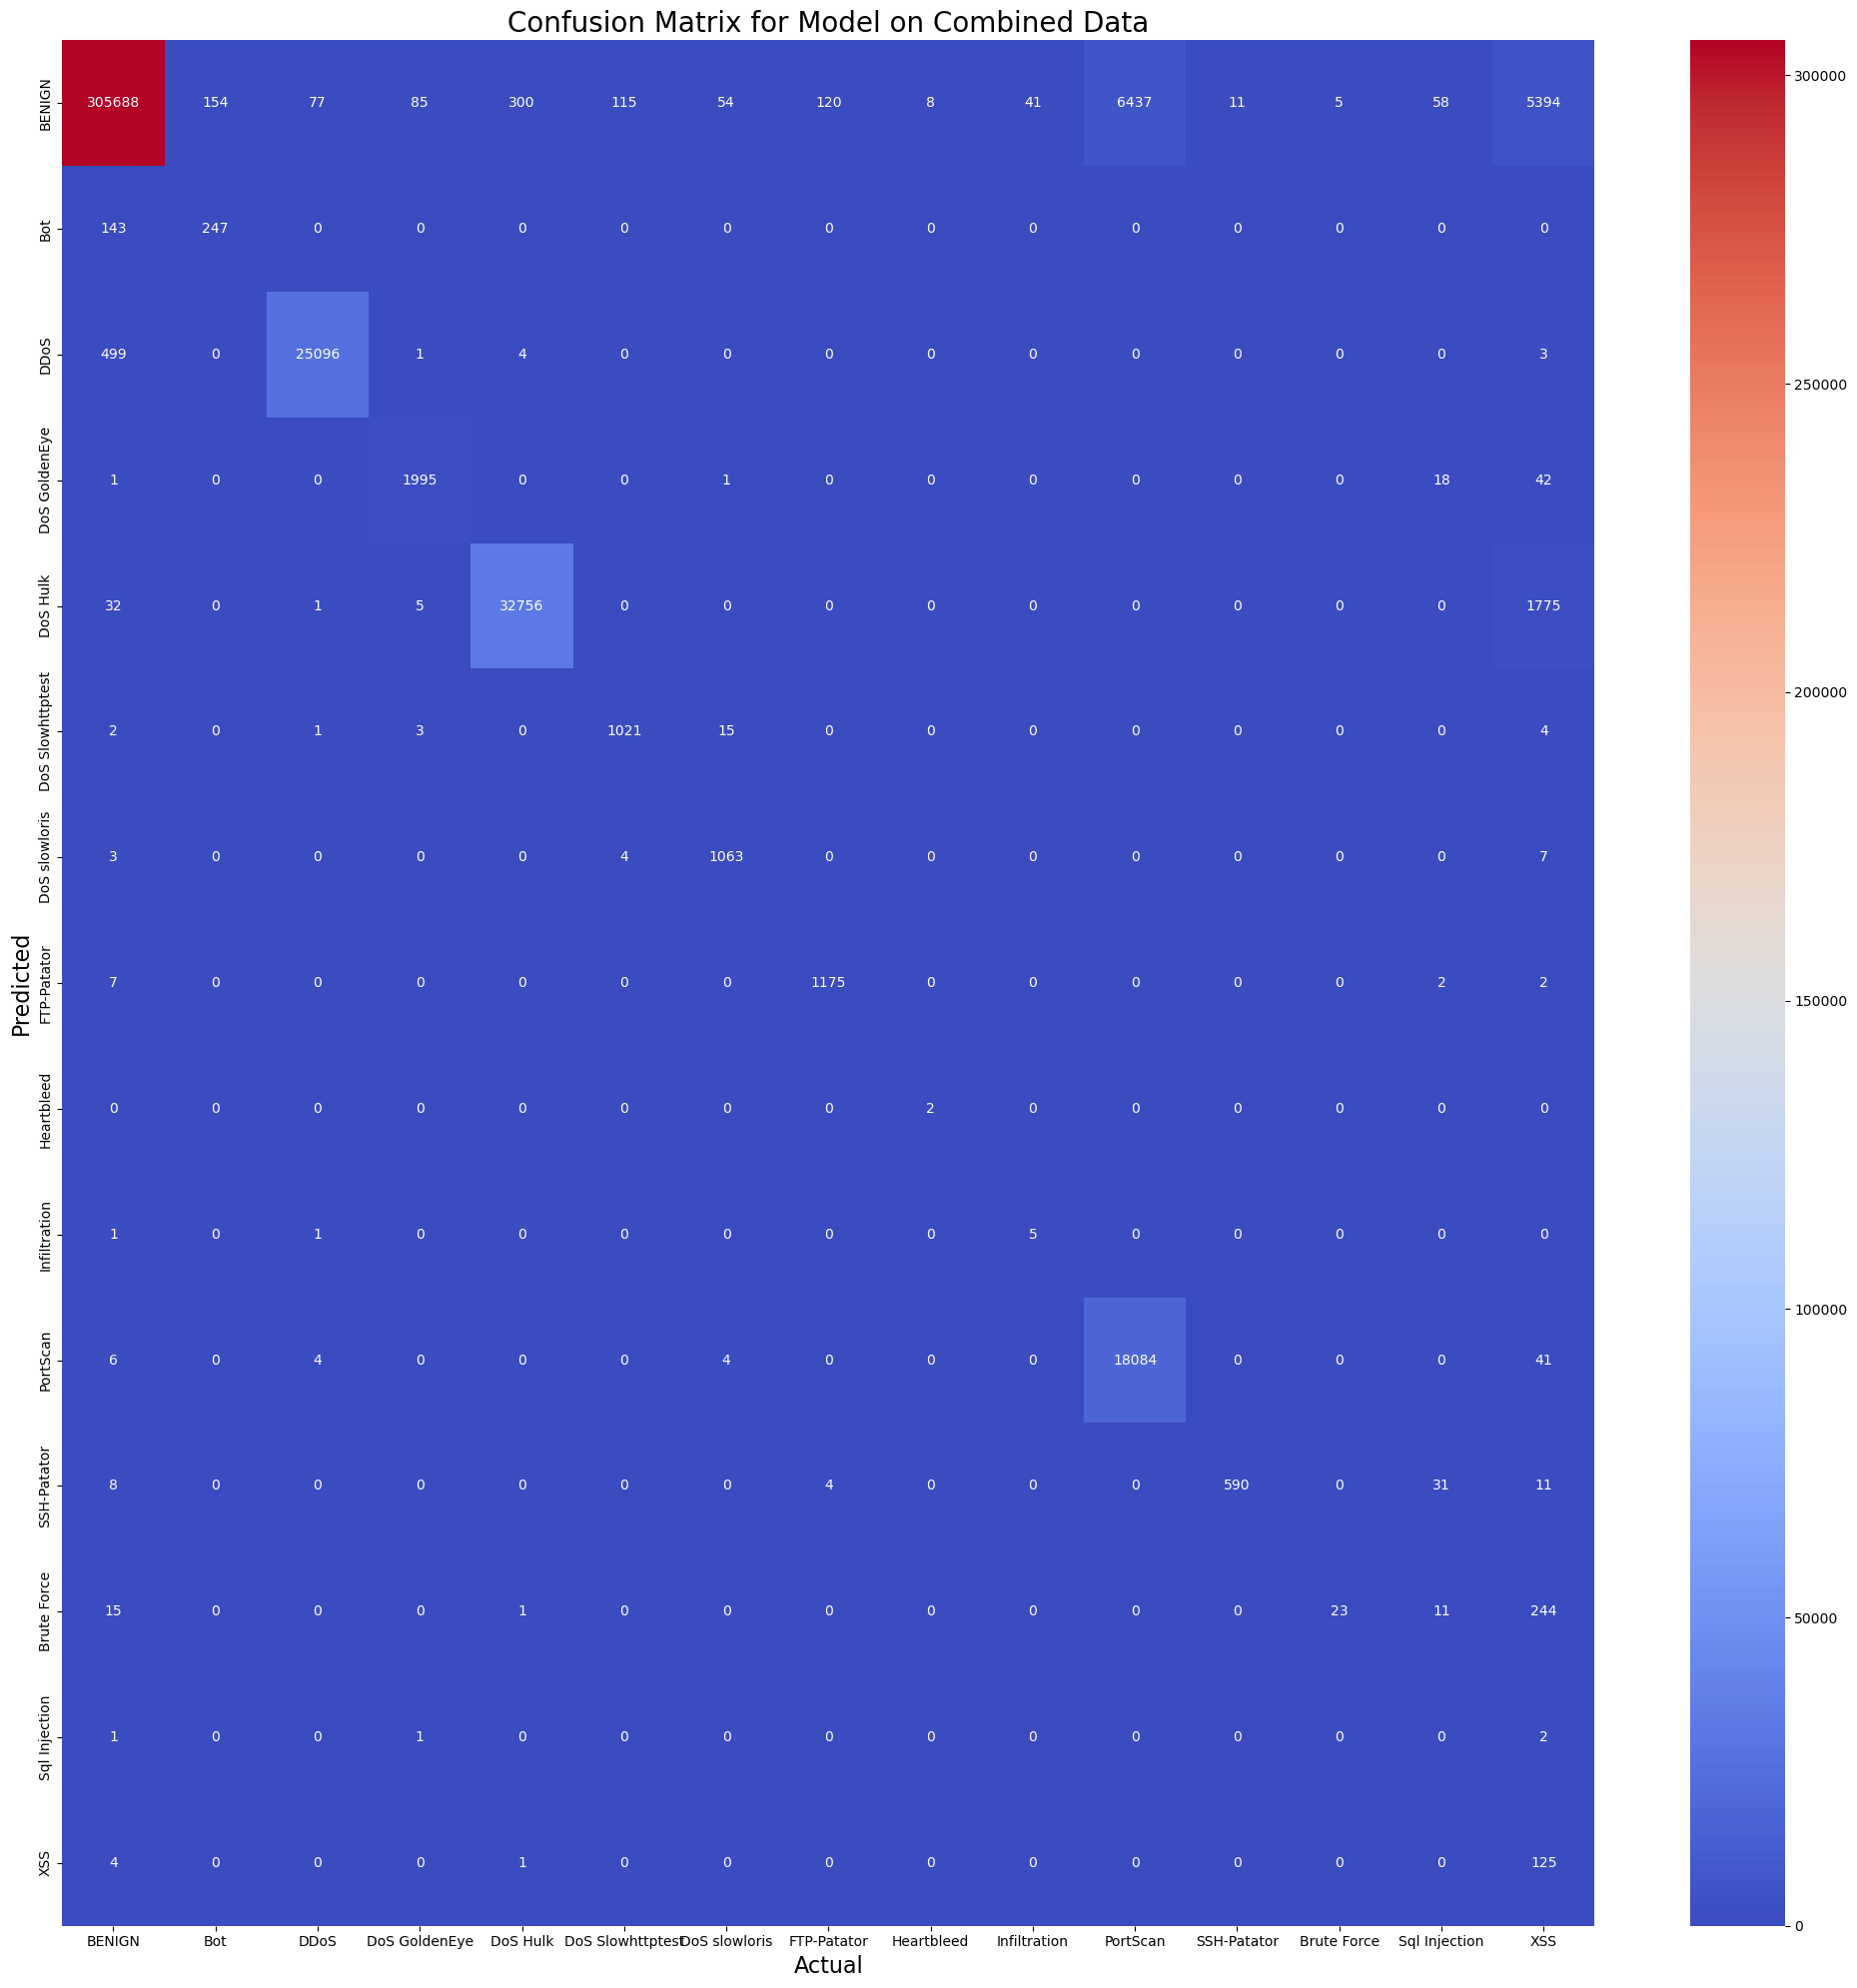

In [102]:
confusion_matrix(model_all_data, title = 'Confusion Matrix for Model on Combined Data')

12616/12616 [==============================] - 27s 2ms/step


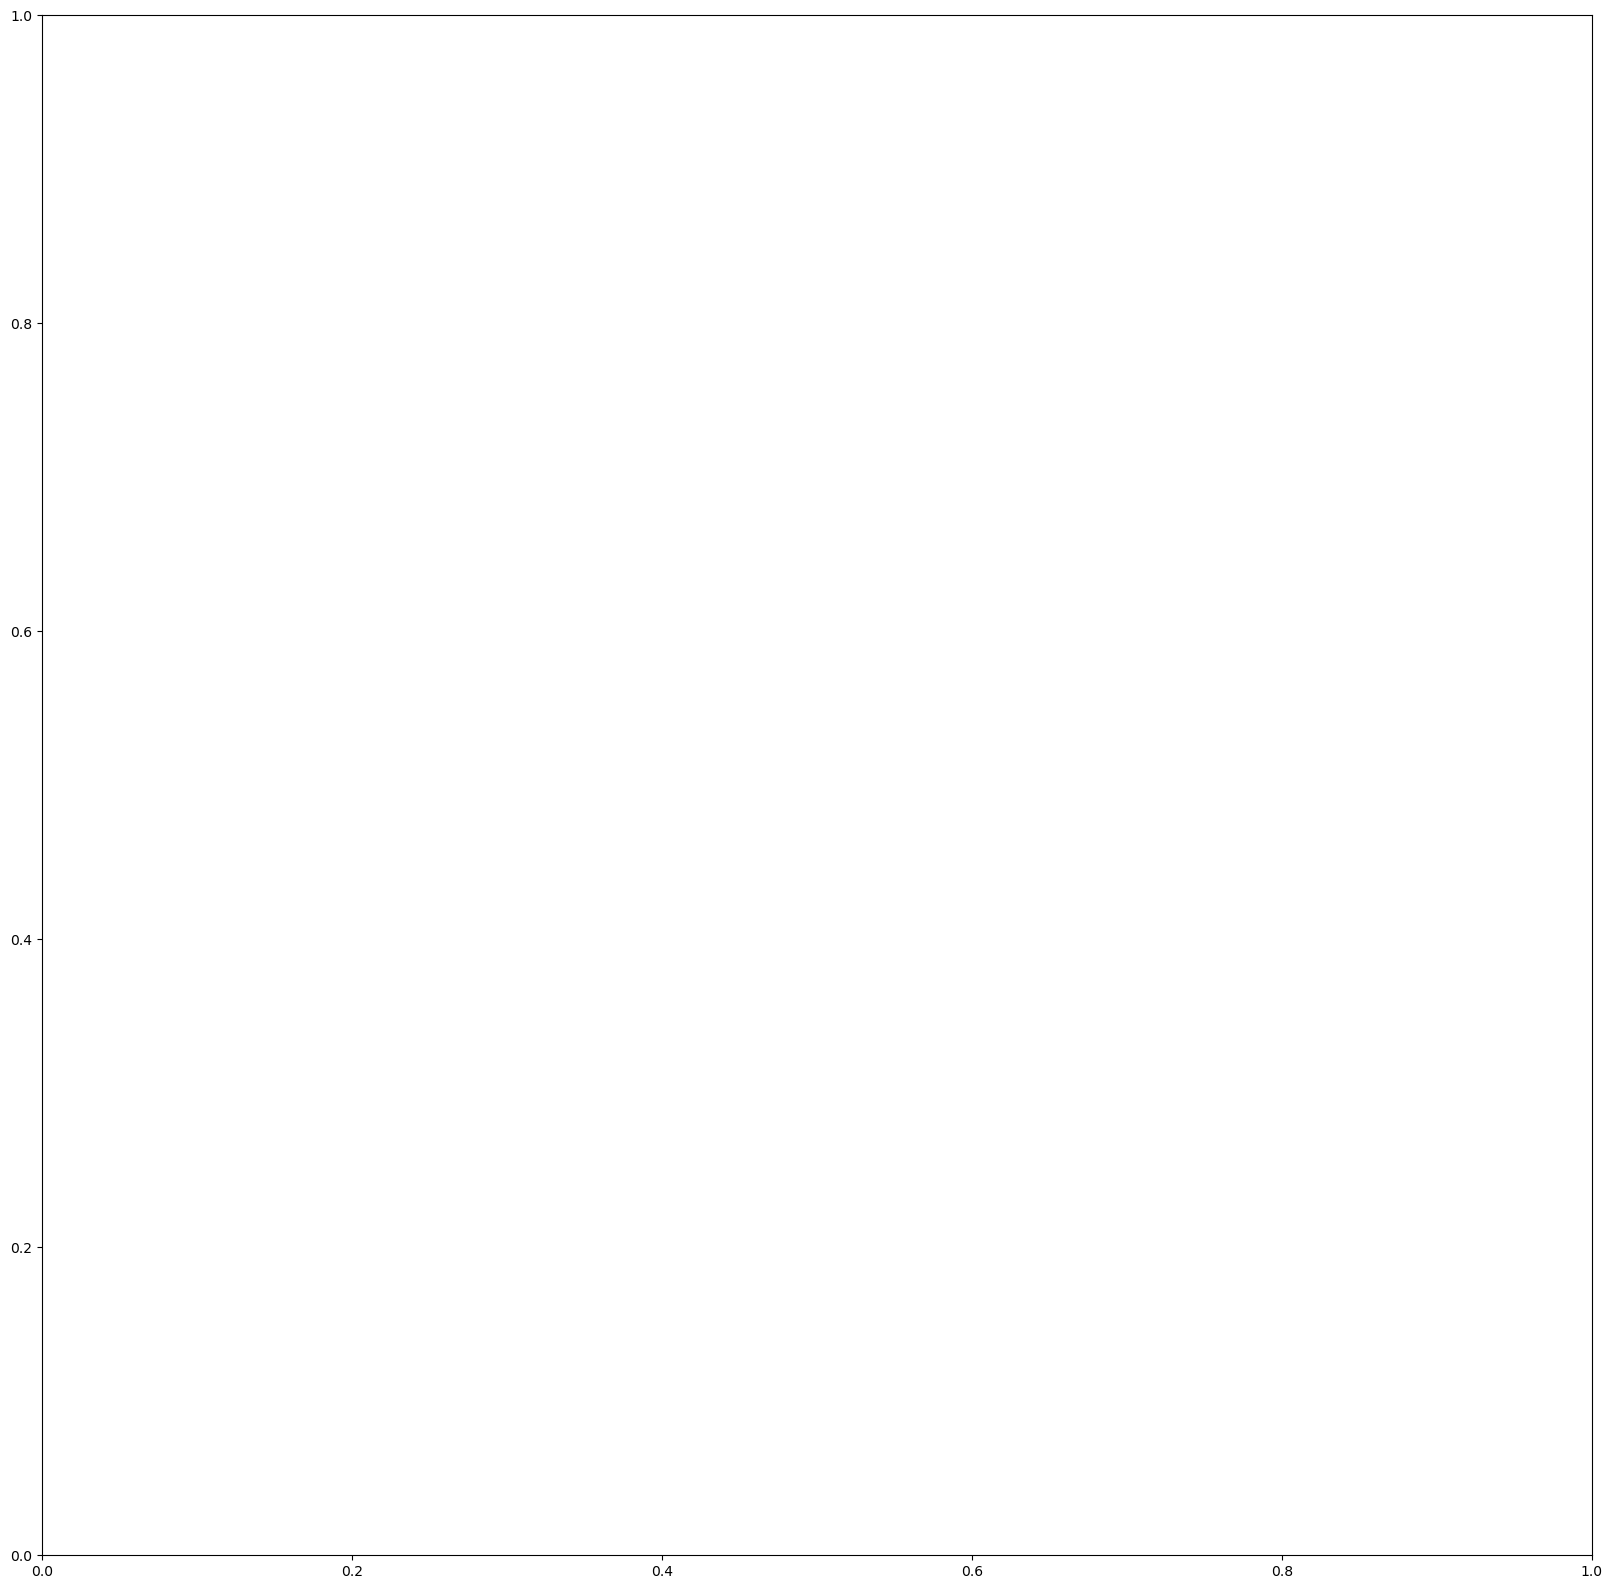

In [112]:
cm = confusion_matrix(model_all_data, title = 'Confusion Matrix for model2')
cm.to_excel('confusion_matrix_combined_model.xlsx', index = True)

### A FedAvg model trained on two datasets with identical distributions

In [44]:
# Epoch wise IID Data
global_model = conv_model.build()
for epoch in range(20):
    global_weights = global_model.get_weights()
    
    model1 = conv_model.build()
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model1.set_weights(global_weights)
    model1.fit(X1_, y1_, epochs=1, batch_size=128, validation_split = 0.2)
    
    model2 = conv_model.build()
    model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model2.set_weights(global_weights)
    model2.fit(X2_, y2_, epochs=1, batch_size=128, validation_split = 0.2)
    
    wts1 = model1.get_weights()
    wts2 = model2.get_weights()
    # w1 = len(X1) / (len(X1) + len(X2))
    # w2 = len(X2) / (len(X1) + len(X2))
    w1 = 0.5
    w2 = 0.5
    W = []
    for i in range(len(wts1)):
        W.append(w1*wts1[i] + w2*wts2[i])
    global_model.set_weights(W)


3585/3585 [==============================] - 39s 11ms/step - loss: 0.0948 - accuracy: 0.9647 - val_loss: 0.0702 - val_accuracy: 0.9700


### A FedAvg model trained on two datasets with very different (non identical) distributions

In [45]:
global_model_non_iid = conv_model.build()
for epoch in range(20):
    global_weights = global_model_non_iid.get_weights()
    
    model1 = conv_model.build()
    model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model1.set_weights(global_weights)
    model1.fit(X1, y1, epochs=1, batch_size=128, validation_split = 0.2)
    
    model2 = conv_model.build()
    model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model2.set_weights(global_weights)
    model2.fit(X2, y2, epochs=1, batch_size=128, validation_split = 0.2)
    
    wts1 = model1.get_weights()
    wts2 = model2.get_weights()
    # w1 = len(X1) / (len(X1) + len(X2))
    # w2 = len(X2) / (len(X1) + len(X2))
    w1 = 0.5
    w2 = 0.5
    W = []
    for i in range(len(wts1)):
        W.append(w1*wts1[i] + w2*wts2[i])
    global_model_non_iid.set_weights(W)

1707/1707 [==============================] - 19s 11ms/step - loss: 0.1356 - accuracy: 0.9610 - val_loss: 0.0908 - val_accuracy: 0.9703


In [46]:
global_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
global_model.evaluate(X_test,yt)

12616/12616 [==============================] - 33s 3ms/step - loss: 0.0699 - accuracy: 0.9653


[0.0698881670832634, 0.9653376936912537]

In [47]:
global_model_non_iid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
global_model_non_iid.evaluate(X_test,yt)

12616/12616 [==============================] - 33s 3ms/step - loss: 0.0796 - accuracy: 0.9651


[0.07956206053495407, 0.9650726318359375]

### Classification Report of model trained on non identically distributed datasets validated on test dataset

In [48]:
report = classification_report(global_model_non_iid)
report.to_excel('report_global_model_non_iid.xlsx')

12616/12616 [==============================] - 29s 2ms/step


,precision,recall,f1-score,support
BENIGN,0.961011,0.995454,0.977929,318547.000000
Bot,0.945578,0.356410,0.517691,390.000000
DDoS,0.998994,0.969691,0.984124,25603.000000
DoS GoldenEye,0.982564,0.931454,0.956326,2057.000000
DoS Hulk,0.991831,0.944748,0.967717,34569.000000
DoS Slowhttptest,0.877342,0.984704,0.927928,1046.000000
DoS slowloris,0.985323,0.935005,0.959505,1077.000000
FTP-Patator,0.802469,0.986509,0.885023,1186.000000
Heartbleed,0.333333,0.500000,0.400000,2.000000
Infiltration,0.161290,0.714286,0.263158,7.000000


12616/12616 [==============================] - 32s 3ms/step


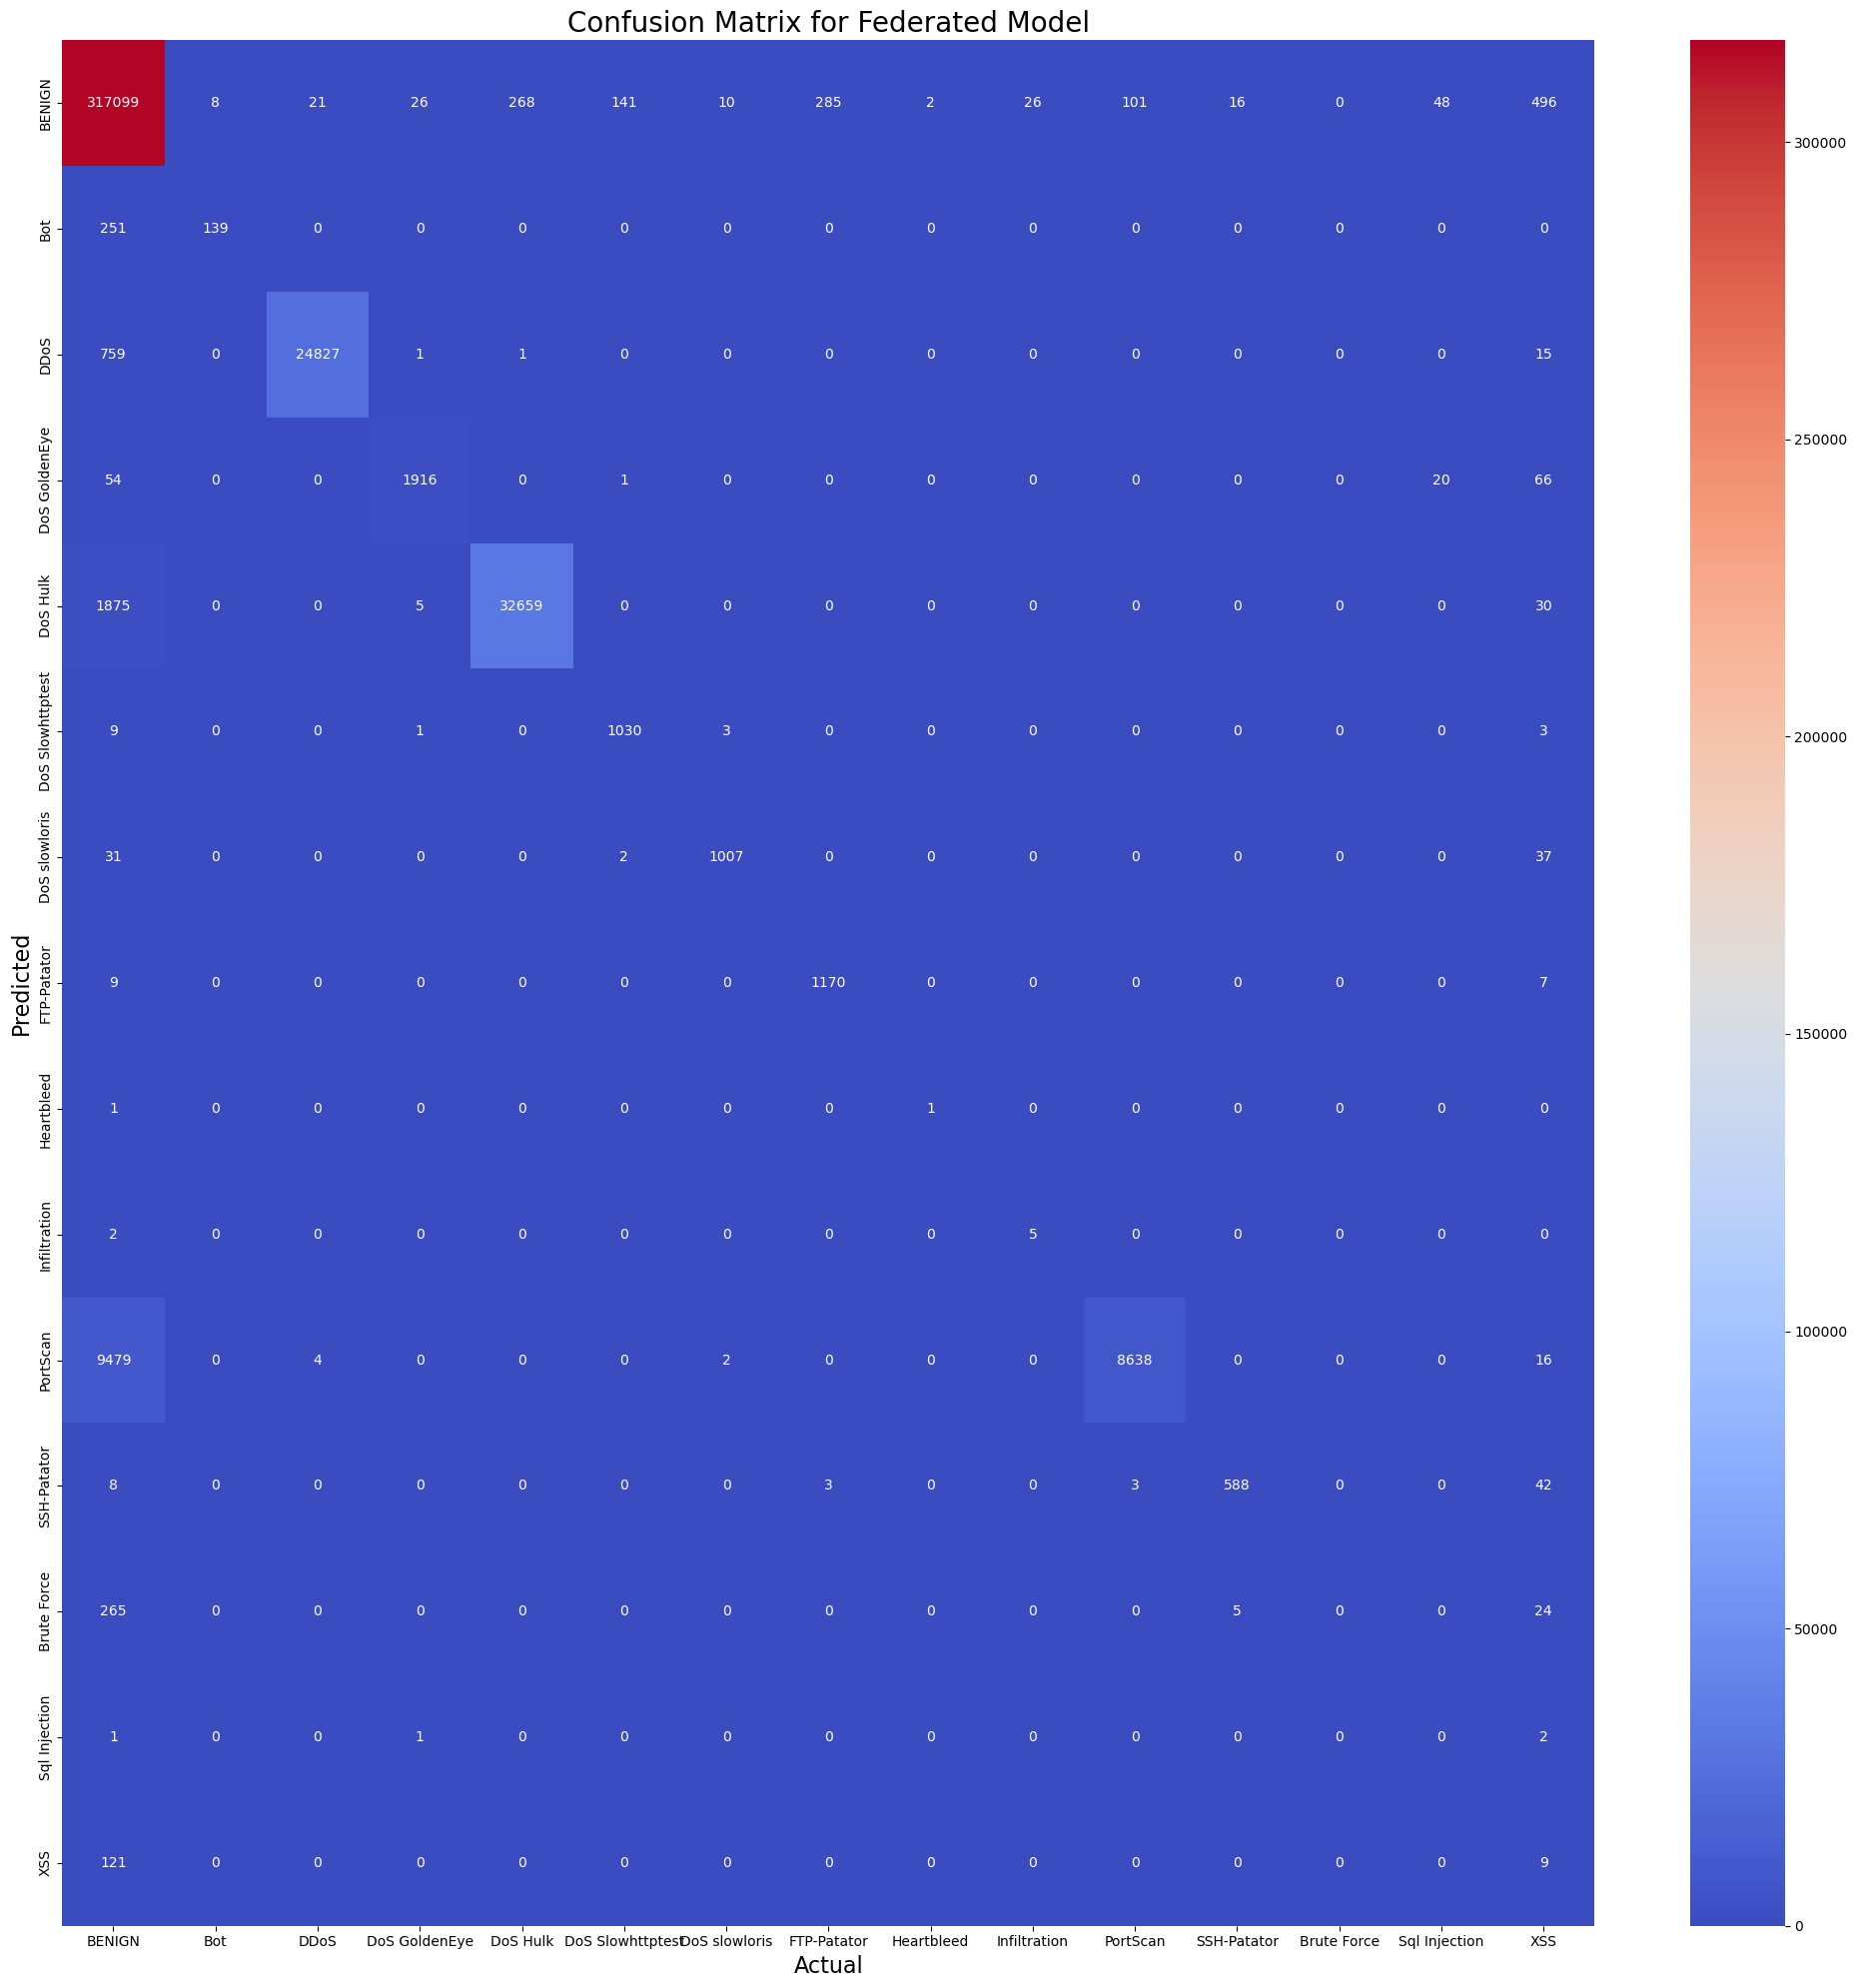

In [101]:
confusion_matrix(global_model_non_iid, title = 'Confusion Matrix for Federated Model')

12616/12616 [==============================] - 27s 2ms/step


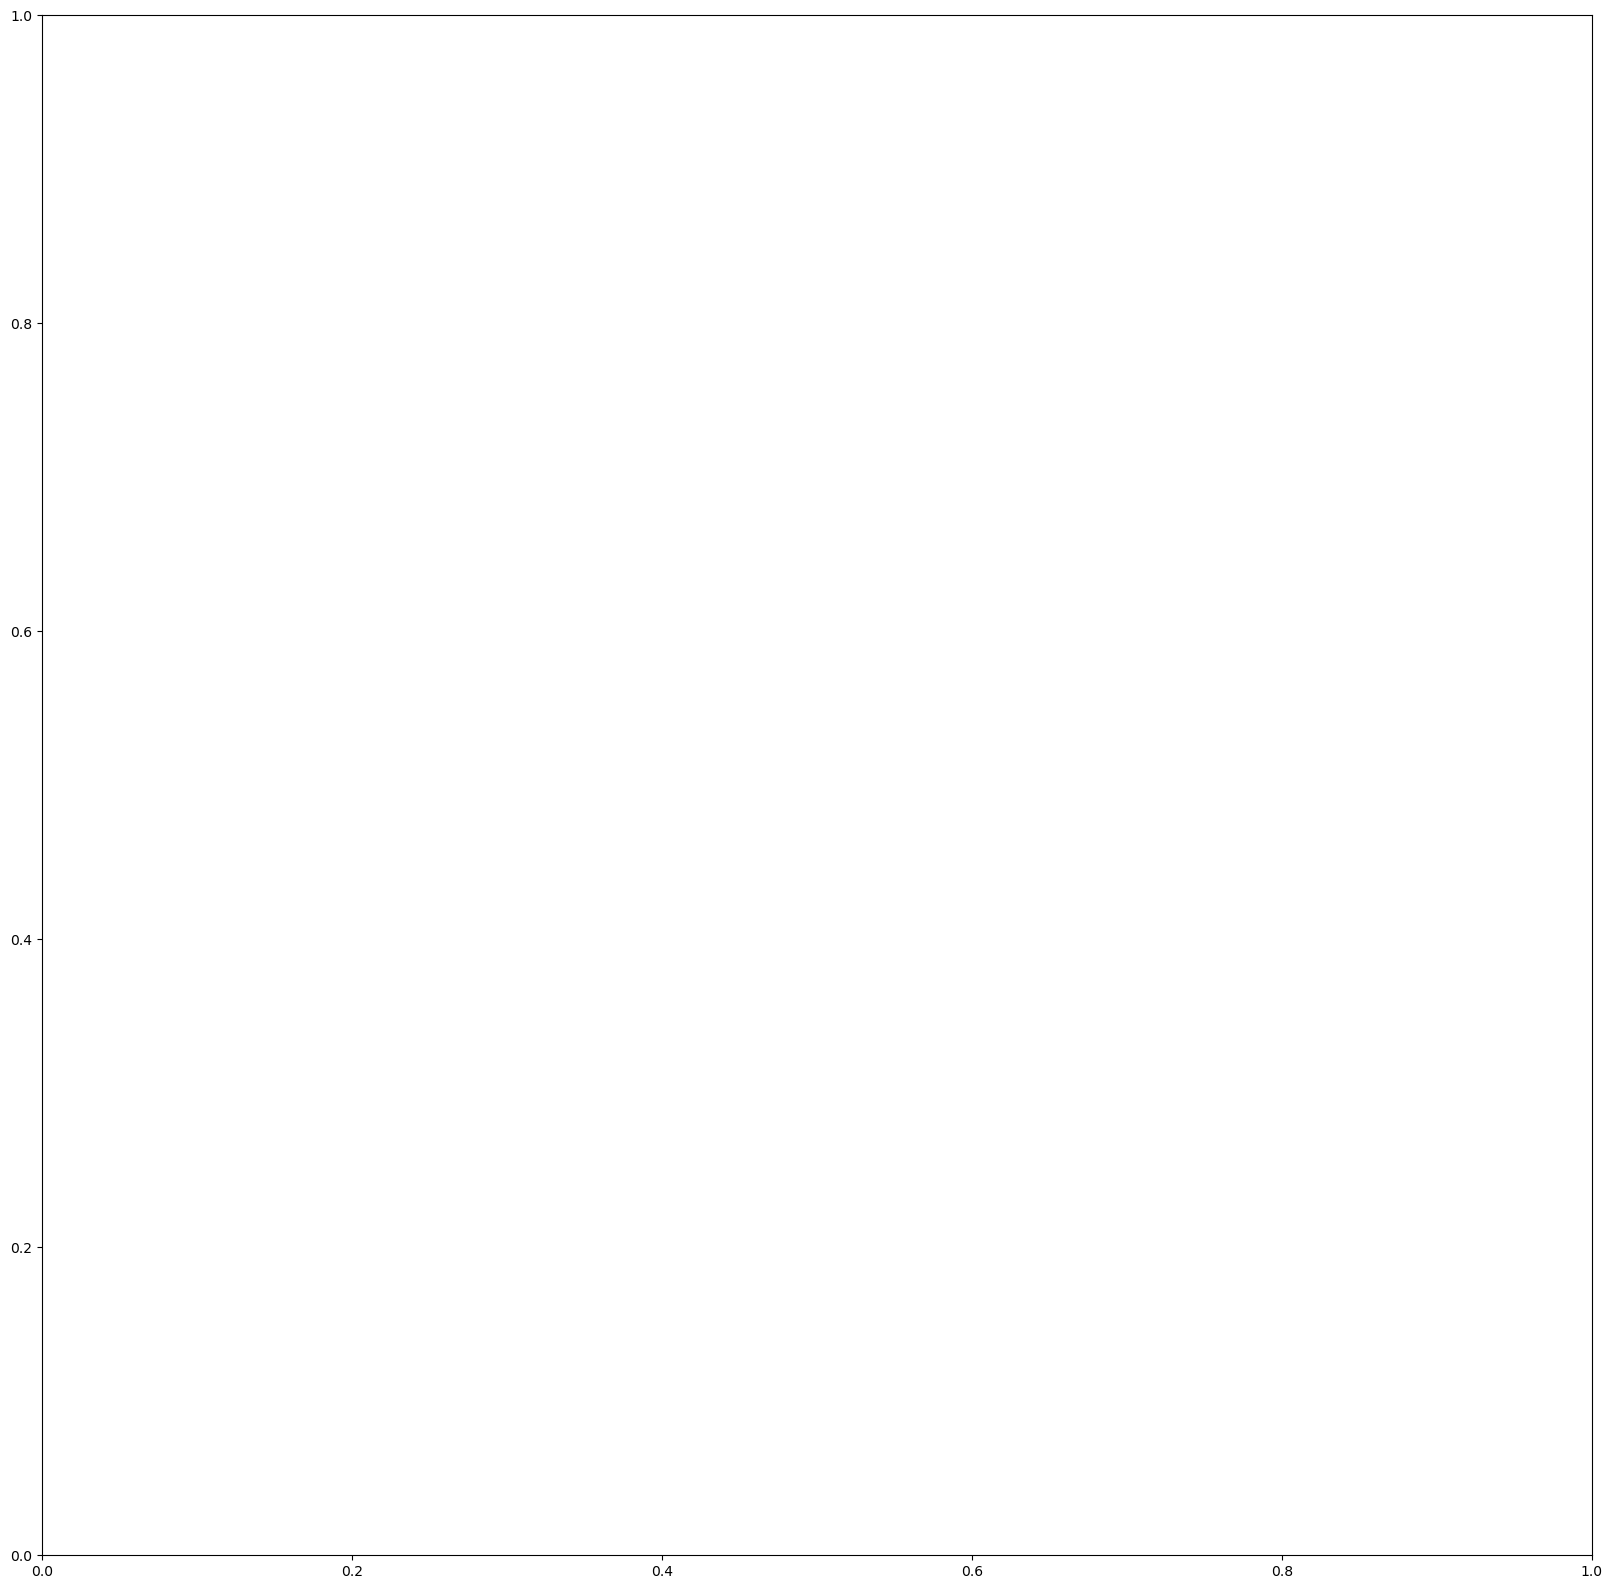

In [111]:
cm = confusion_matrix(global_model_non_iid, title = 'Confusion Matrix for model2')
cm.to_excel('confusion_matrix_fed.xlsx', index = True)

### Classification Report of model trained on identically distributed datasets validated on test dataset

In [49]:
report = classification_report(global_model)
report.to_excel('report_global_model.xlsx')

12616/12616 [==============================] - 28s 2ms/step


,precision,recall,f1-score,support
BENIGN,0.997648,0.954920,0.975817,318547.000000
Bot,0.591449,0.638462,0.614057,390.000000
DDoS,0.997334,0.978909,0.988035,25603.000000
DoS GoldenEye,0.947546,0.957219,0.952358,2057.000000
DoS Hulk,0.870474,0.999248,0.930426,34569.000000
DoS Slowhttptest,0.873828,0.979924,0.923840,1046.000000
DoS slowloris,0.935626,0.985144,0.959747,1077.000000
FTP-Patator,0.801090,0.991568,0.886209,1186.000000
Heartbleed,0.400000,1.000000,0.571429,2.000000
Infiltration,0.151515,0.714286,0.250000,7.000000


## Showing how individual models trained on two non identically distributed datasets behave on the test data

#### Feature Set 1 ['DoS Slowhttptest', 'DoS slowloris', 'DoS GoldenEye', 'DoS Hulk', 'DDoS']

In [50]:
model1 = conv_model.build()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X1, y1, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
4838/4838 [==============================] - 47s 10ms/step - loss: 0.1622 - accuracy: 0.9456 - val_loss: 0.0554 - val_accuracy: 0.9763
Epoch 2/20
4838/4838 [==============================] - 47s 10ms/step - loss: 0.0723 - accuracy: 0.9726 - val_loss: 0.0403 - val_accuracy: 0.9830
Epoch 3/20
4838/4838 [==============================] - 47s 10ms/step - loss: 0.0621 - accuracy: 0.9762 - val_loss: 0.0374 - val_accuracy: 0.9820
Epoch 4/20
4838/4838 [==============================] - 48s 10ms/step - loss: 0.0553 - accuracy: 0.9782 - val_loss: 0.0352 - val_accuracy: 0.9834
Epoch 5/20
4838/4838 [==============================] - 48s 10ms/step - loss: 0.0516 - accuracy: 0.9794 - val_loss: 0.0347 - val_accuracy: 0.9851
Epoch 6/20
4838/4838 [==============================] - 48s 10ms/step - loss: 0.0505 - accuracy: 0.9797 - val_loss: 0.0325 - val_accuracy: 0.9884
Epoch 7/20
4838/4838 [==============================] - 49s 10ms/step - loss: 0.0494 - accuracy: 0.9801 - val_loss: 0.0316 -

In [51]:
report = classification_report(model1)
report.to_excel('report_model1.xlsx')

12616/12616 [==============================] - 33s 3ms/step


,precision,recall,f1-score,support
BENIGN,0.936568,0.980505,0.958033,318547.000000
Bot,0.000000,0.000000,0.000000,390.000000
DDoS,0.996907,0.982072,0.989434,25603.000000
DoS GoldenEye,0.919745,0.980554,0.949176,2057.000000
DoS Hulk,0.860582,0.998872,0.924585,34569.000000
DoS Slowhttptest,0.873396,0.976099,0.921896,1046.000000
DoS slowloris,0.894781,0.987001,0.938631,1077.000000
FTP-Patator,0.000000,0.000000,0.000000,1186.000000
Heartbleed,0.000000,0.000000,0.000000,2.000000
Infiltration,0.000000,0.000000,0.000000,7.000000


12616/12616 [==============================] - 29s 2ms/step


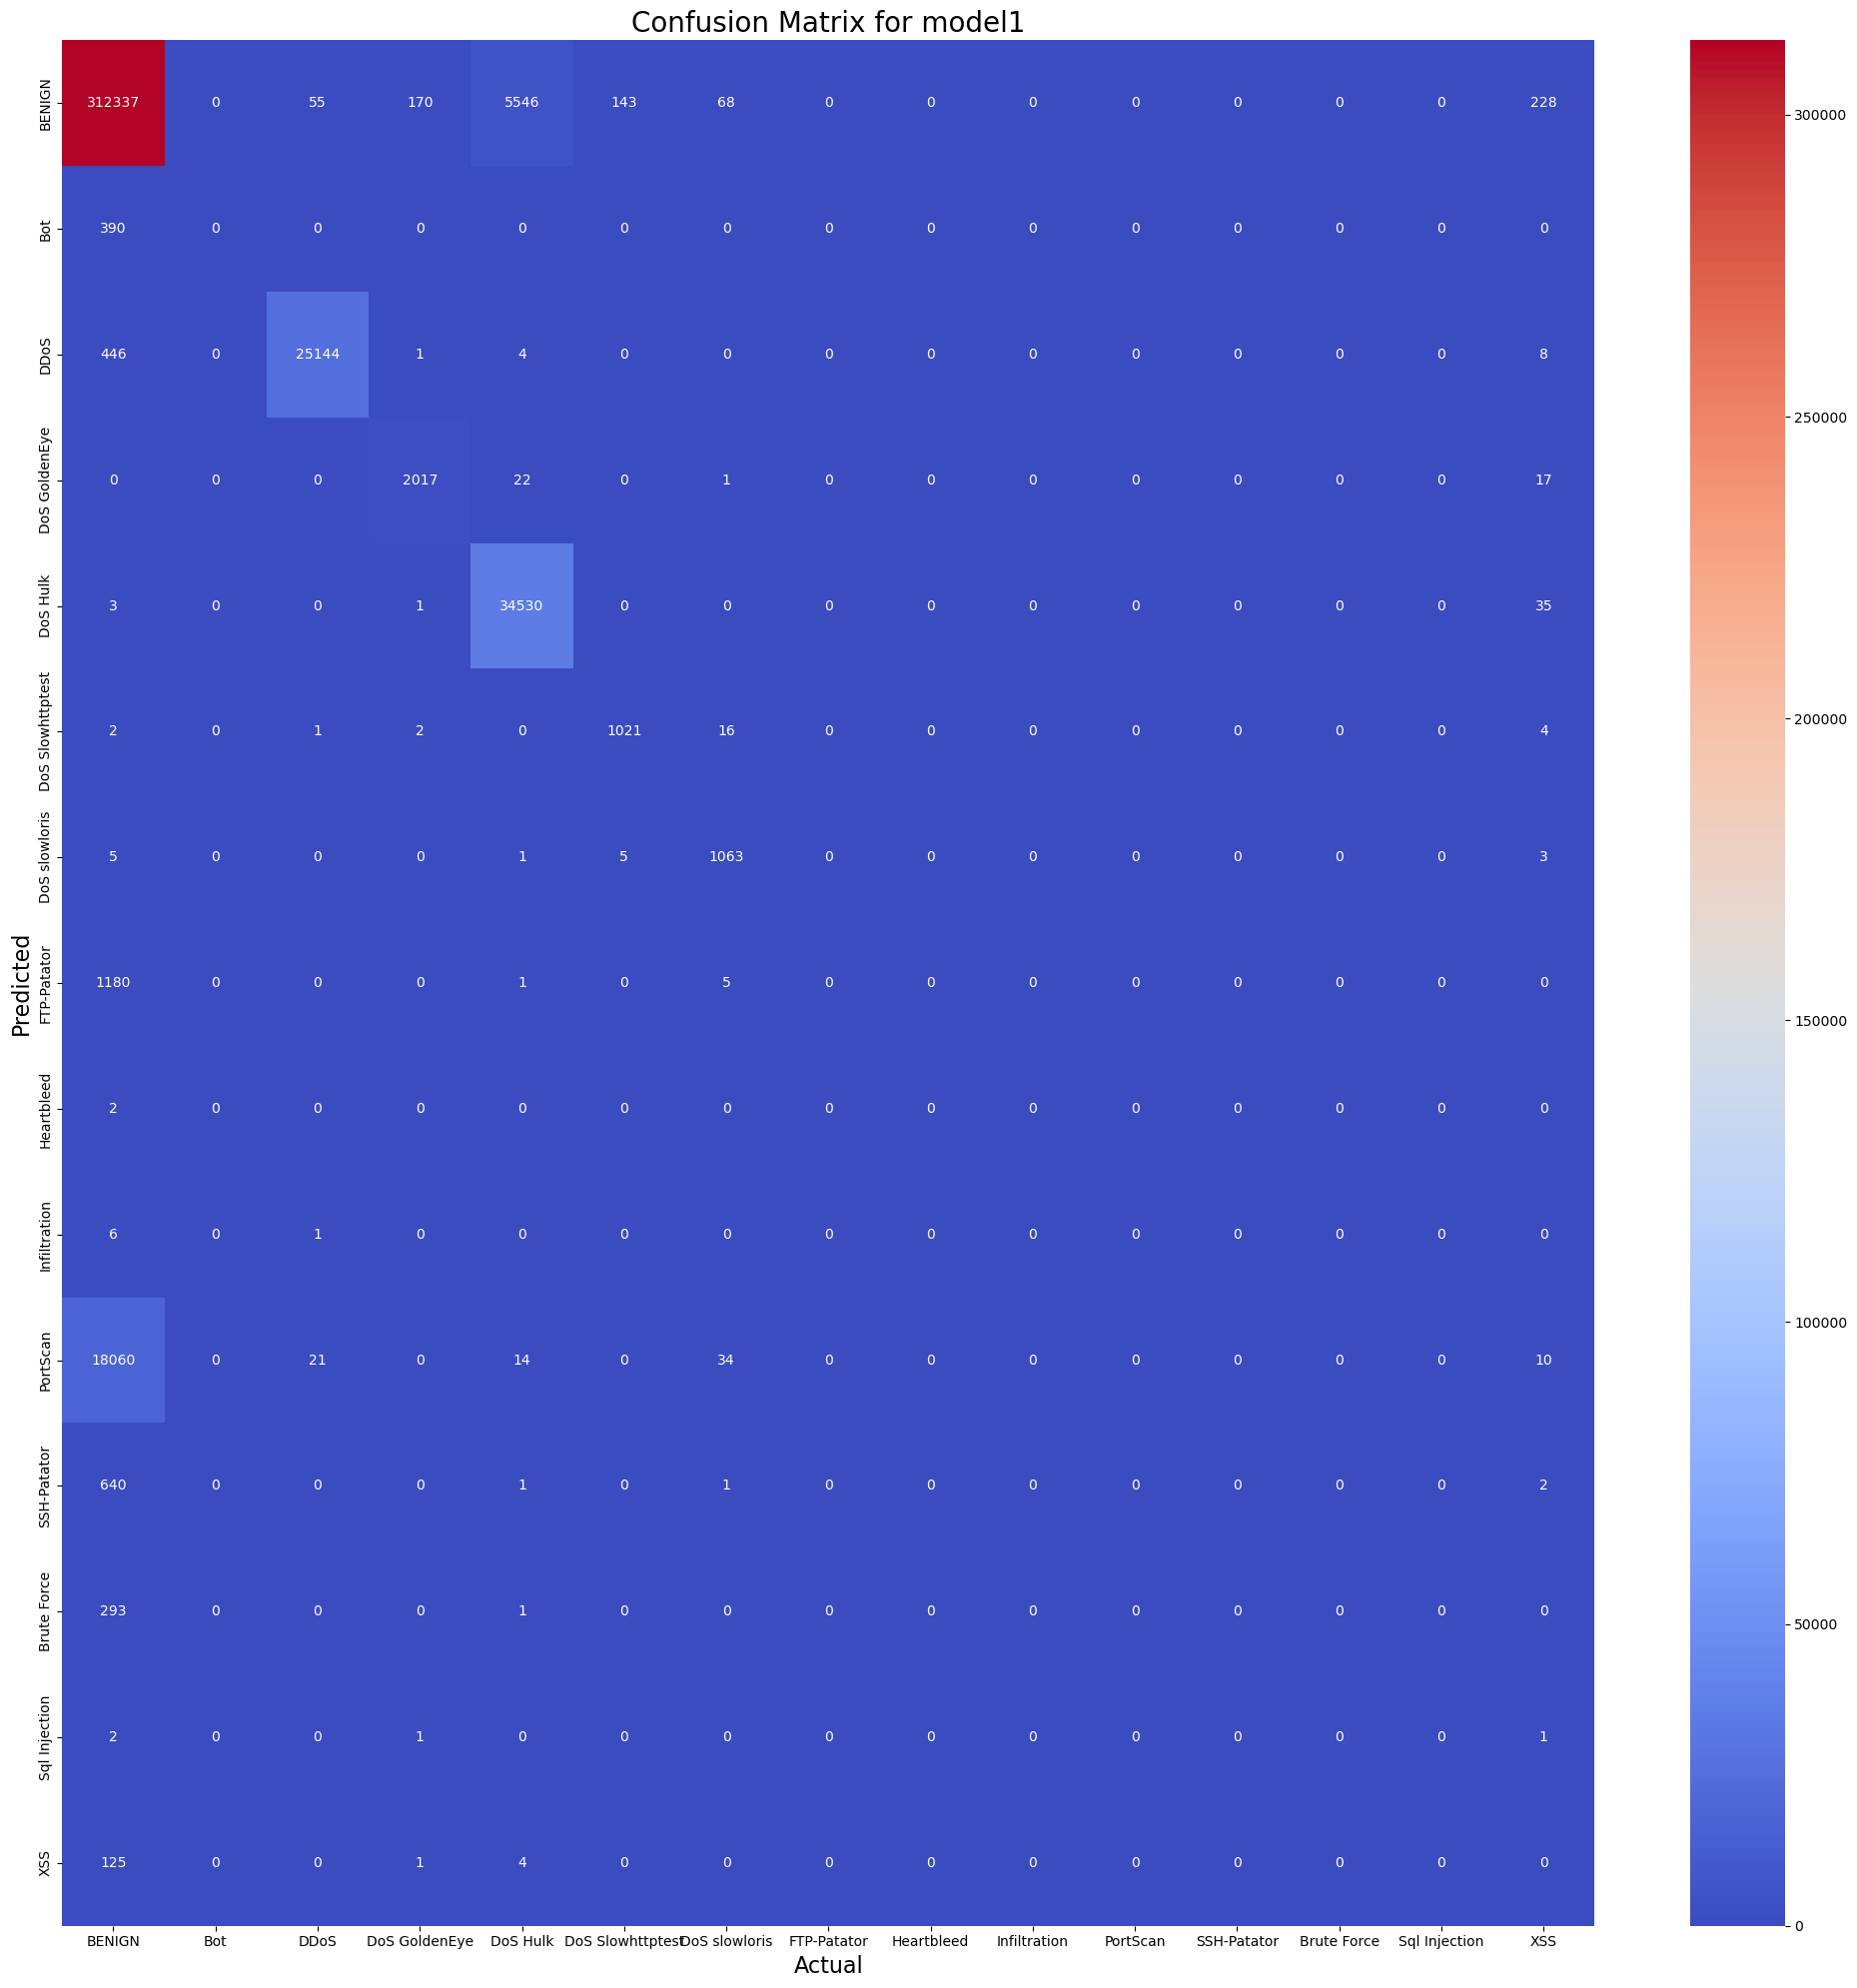

In [99]:
confusion_matrix(model1, title = 'Confusion Matrix for model1')

#### Feature Set 2 [Rest of the features]

In [52]:
model2 = conv_model.build()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X2, y2, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
1707/1707 [==============================] - 22s 12ms/step - loss: 0.3352 - accuracy: 0.9074 - val_loss: 0.1585 - val_accuracy: 0.9577
Epoch 2/20
1707/1707 [==============================] - 17s 10ms/step - loss: 0.1922 - accuracy: 0.9470 - val_loss: 0.1280 - val_accuracy: 0.9618
Epoch 3/20
1707/1707 [==============================] - 20s 12ms/step - loss: 0.1613 - accuracy: 0.9535 - val_loss: 0.1135 - val_accuracy: 0.9649
Epoch 4/20
1707/1707 [==============================] - 19s 11ms/step - loss: 0.1479 - accuracy: 0.9576 - val_loss: 0.1046 - val_accuracy: 0.9672
Epoch 5/20
1707/1707 [==============================] - 17s 10ms/step - loss: 0.1431 - accuracy: 0.9588 - val_loss: 0.0983 - val_accuracy: 0.9689
Epoch 6/20
1707/1707 [==============================] - 20s 12ms/step - loss: 0.1333 - accuracy: 0.9605 - val_loss: 0.1007 - val_accuracy: 0.9655
Epoch 7/20
1707/1707 [==============================] - 18s 11ms/step - loss: 0.1315 - accuracy: 0.9613 - val_loss: 0.0932 -

In [53]:
report = classification_report(model2)
report.to_excel('report_model2.xlsx')

12616/12616 [==============================] - 32s 2ms/step


,precision,recall,f1-score,support
BENIGN,0.831368,0.969960,0.895333,318547.000000
Bot,0.382609,0.676923,0.488889,390.000000
DDoS,0.000000,0.000000,0.000000,25603.000000
DoS GoldenEye,0.000000,0.000000,0.000000,2057.000000
DoS Hulk,0.000000,0.000000,0.000000,34569.000000
DoS Slowhttptest,0.000000,0.000000,0.000000,1046.000000
DoS slowloris,0.000000,0.000000,0.000000,1077.000000
FTP-Patator,0.902757,0.994098,0.946228,1186.000000
Heartbleed,0.181818,1.000000,0.307692,2.000000
Infiltration,0.054348,0.714286,0.101010,7.000000


12616/12616 [==============================] - 28s 2ms/step


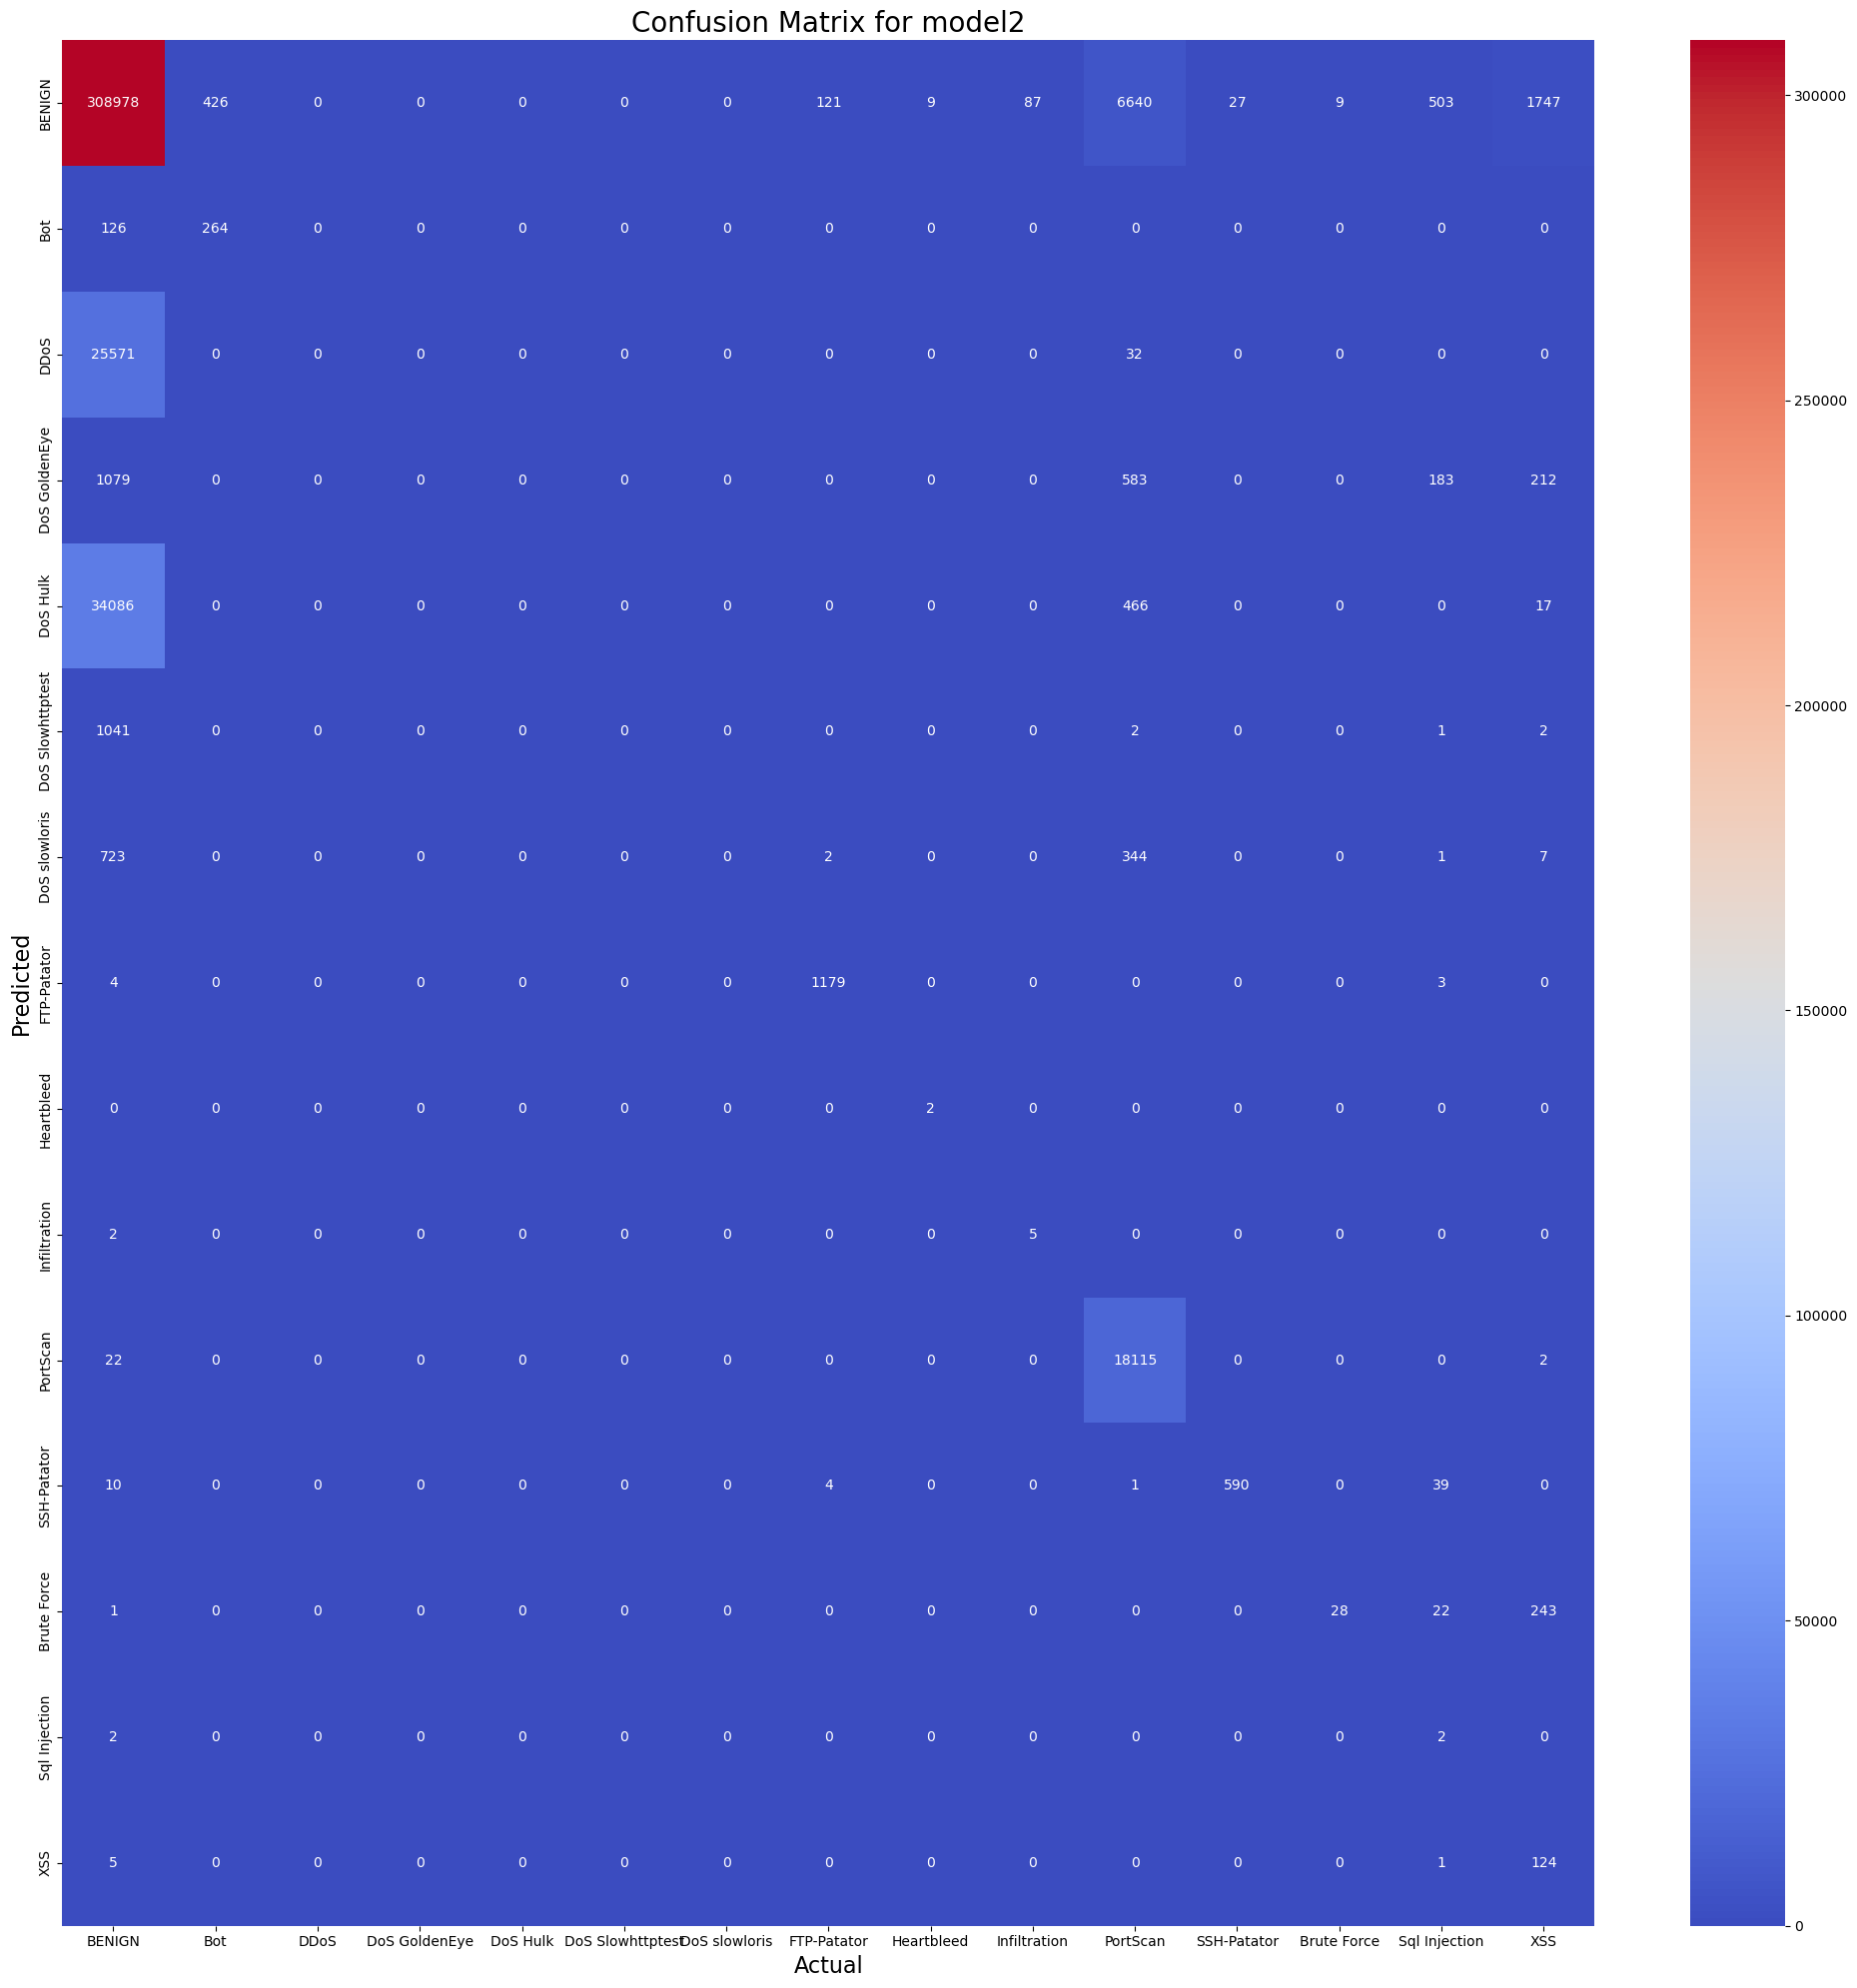

In [98]:
confusion_matrix(model2, title = 'Confusion Matrix for model2')

12616/12616 [==============================] - 27s 2ms/step


,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Brute Force,Sql Injection,XSS
BENIGN,308978,426,0,0,0,0,0,121,9,87,6640,27,9,503,1747
Bot,126,264,0,0,0,0,0,0,0,0,0,0,0,0,0
DDoS,25571,0,0,0,0,0,0,0,0,0,32,0,0,0,0
DoS GoldenEye,1079,0,0,0,0,0,0,0,0,0,583,0,0,183,212
DoS Hulk,34086,0,0,0,0,0,0,0,0,0,466,0,0,0,17
DoS Slowhttptest,1041,0,0,0,0,0,0,0,0,0,2,0,0,1,2
DoS slowloris,723,0,0,0,0,0,0,2,0,0,344,0,0,1,7
FTP-Patator,4,0,0,0,0,0,0,1179,0,0,0,0,0,3,0
Heartbleed,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
Infiltration,2,0,0,0,0,0,0,0,0,5,0,0,0,0,0


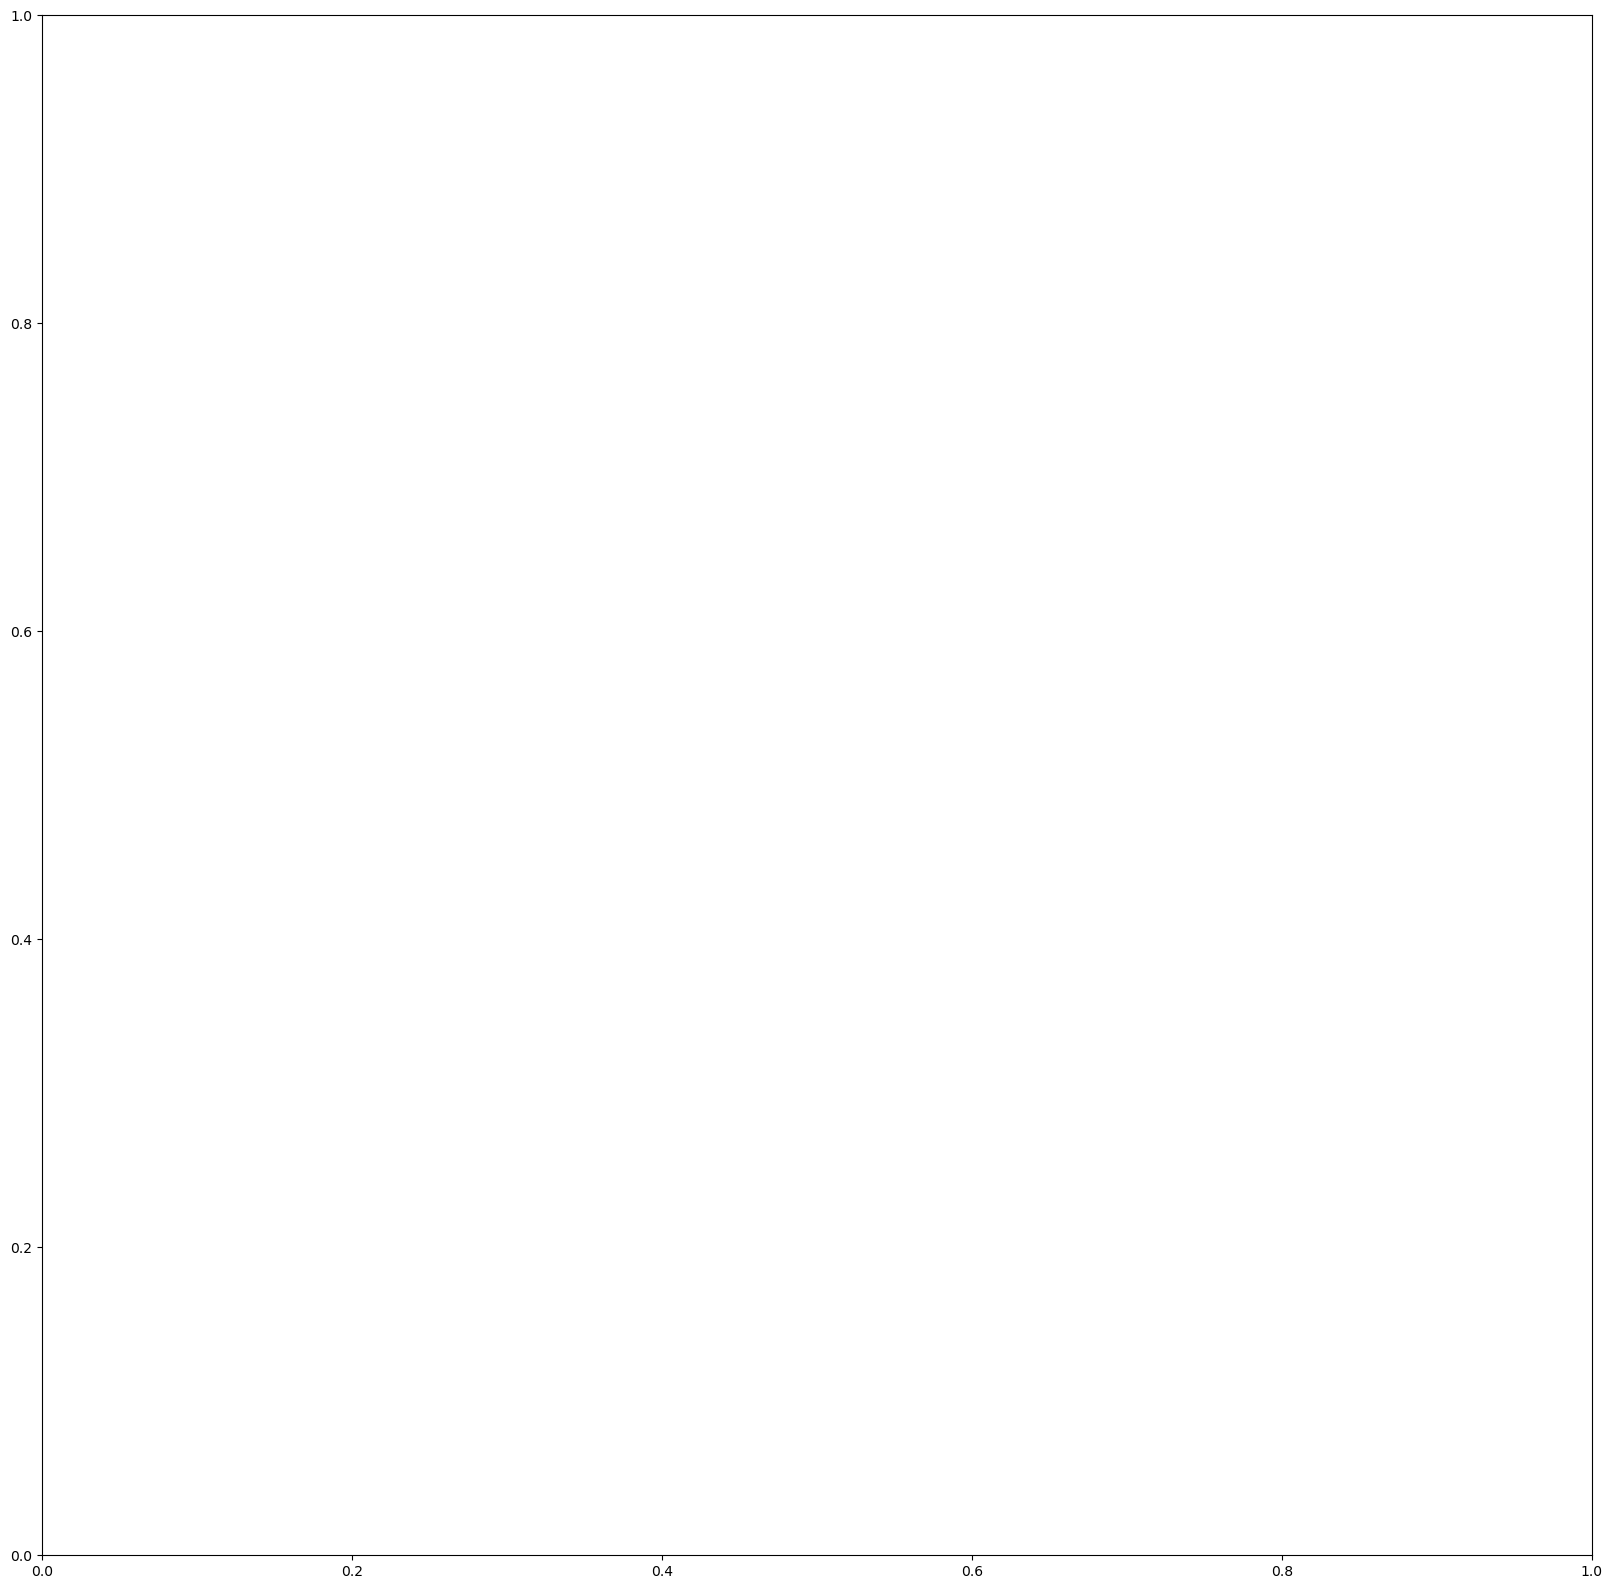

In [108]:
cm = confusion_matrix(model2, title = 'Confusion Matrix for model2')
cm

_____________________________________________________________________________________________________________________